In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
from sklearn.impute import KNNImputer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatherww2/Summary of Weather.csv
/kaggle/input/weatherww2/Weather Station Locations.csv


#### we worked on kaggle notebook.So all of the datasets are already present there.


## Contribution of Group


In [3]:
weather_data = pd.read_csv("/kaggle/input/weatherww2/Weather Station Locations.csv")
weather_data = pd.read_csv("/kaggle/input/weatherww2/Summary of Weather.csv",na_values = "NaN",dtype={"STA": int, "WindGustSpd": float, "SnowDepth": float, "WT03": float})
print(weather_data.head())
print(weather_data.info())

     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 N

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(weather_data.isna().head())

     STA   Date  Precip  WindGustSpd  MaxTemp  MinTemp  MeanTemp  Snowfall  \
0  False  False   False         True    False    False     False     False   
1  False  False   False         True    False    False     False     False   
2  False  False   False         True    False    False     False     False   
3  False  False   False         True    False    False     False     False   
4  False  False   False         True    False    False     False     False   

   PoorWeather     YR  ...    FB   FTI   ITH   PGT  TSHDSBRSGF   SD3   RHX  \
0         True  False  ...  True  True  True  True        True  True  True   
1         True  False  ...  True  True  True  True        True  True  True   
2         True  False  ...  True  True  True  True        True  True  True   
3         True  False  ...  True  True  True  True        True  True  True   
4         True  False  ...  True  True  True  True        True  True  True   

    RHN   RVG   WTE  
0  True  True  True  
1  True  True  Tru

In [4]:
# Check for missing values in the data set
print(weather_data.isnull().sum())

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


In [5]:
# Identify missing data using pandas
missing_data = weather_data[weather_data.isna().any(axis=1)]
print(missing_data.head())


     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 N

AxesSubplot(0.125,0.11;0.698618x0.77)


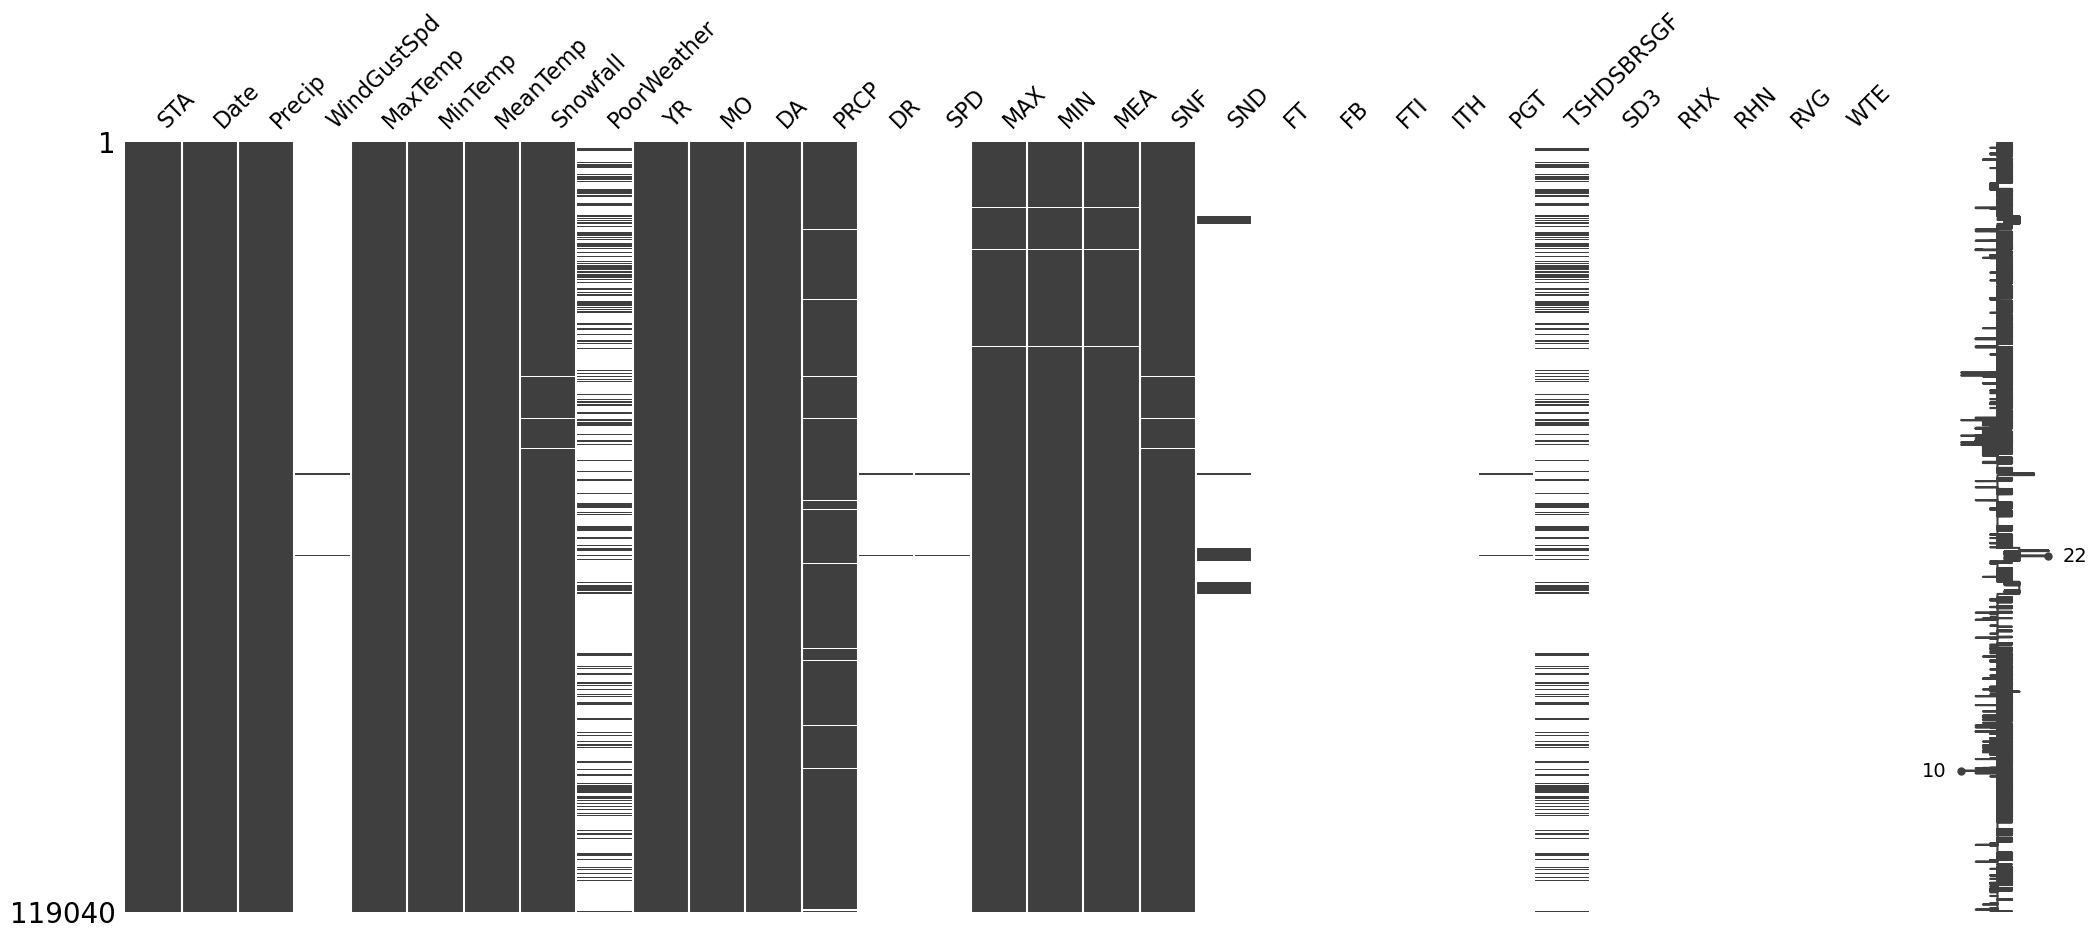

In [6]:
# Plot the missing data using missingno
print(msno.matrix(weather_data))

<AxesSubplot:>

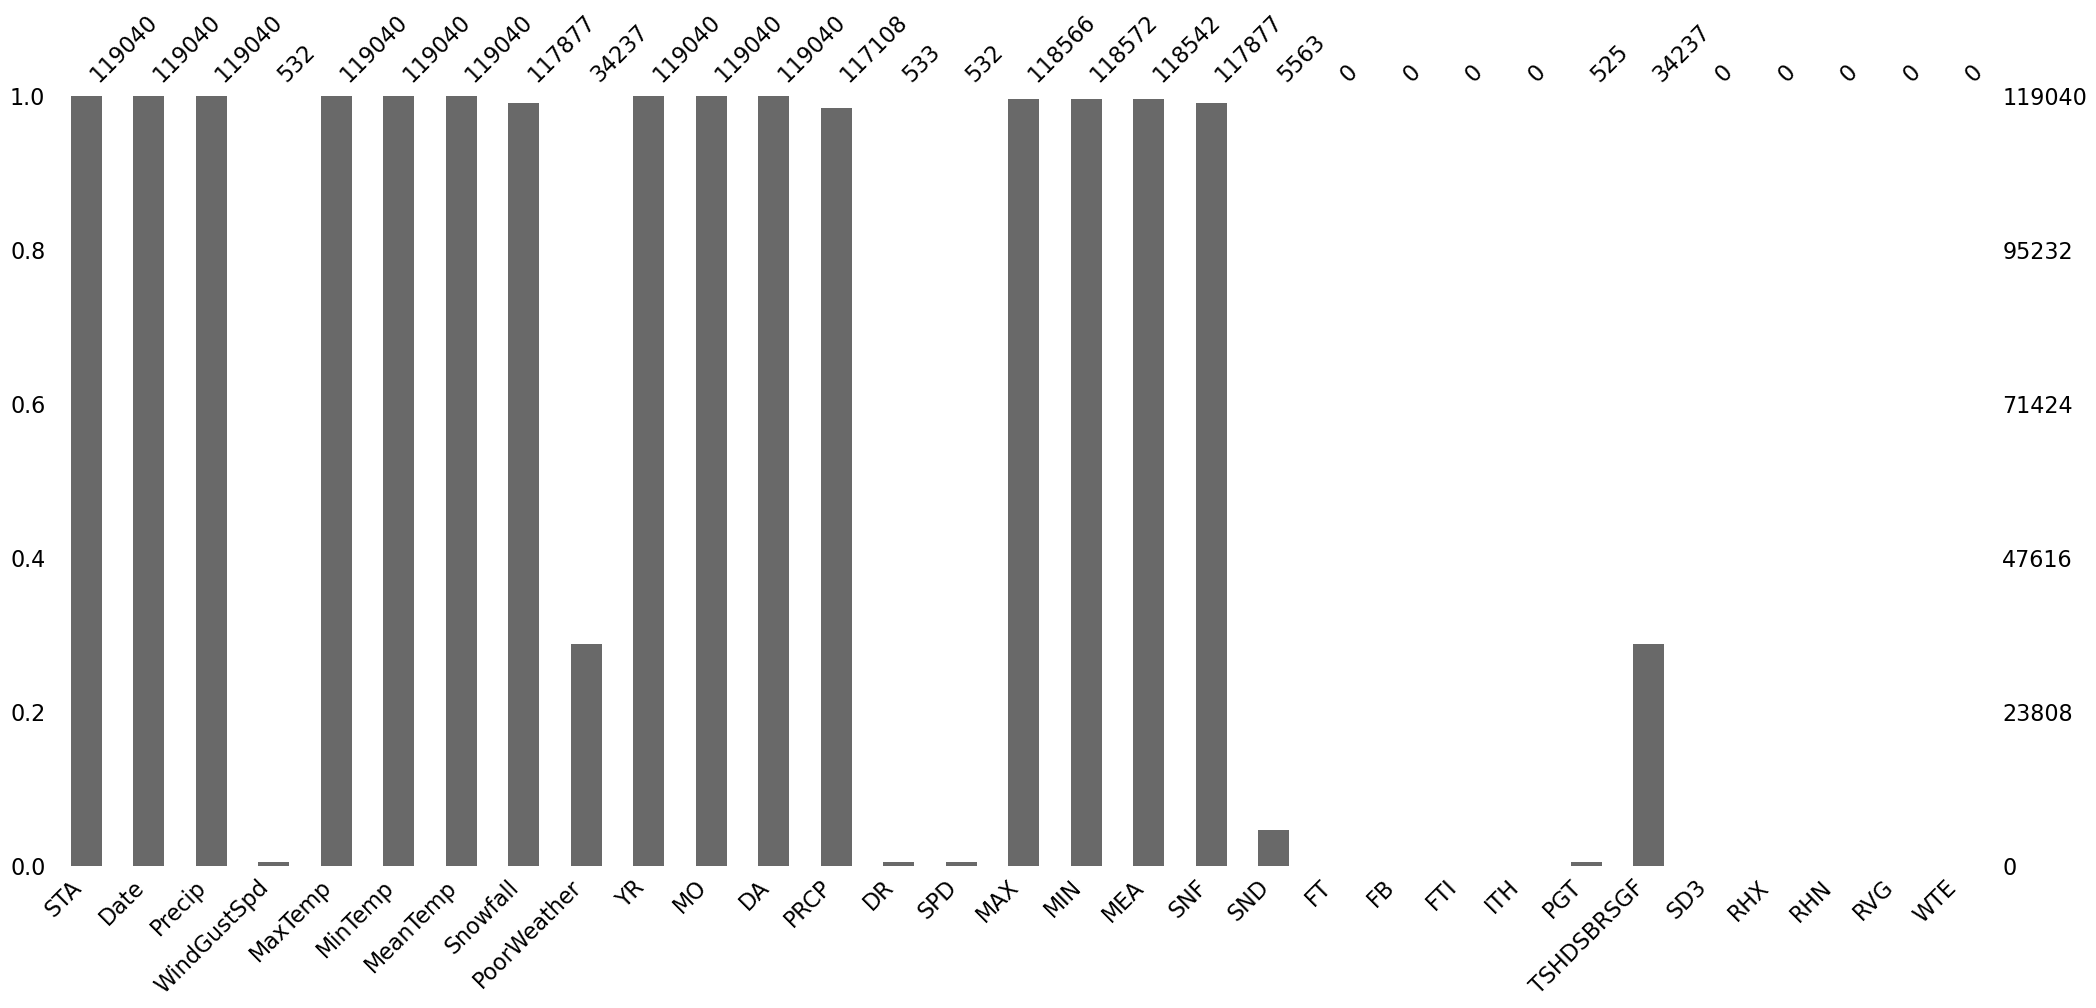

In [7]:
msno.bar(weather_data)

<AxesSubplot:>

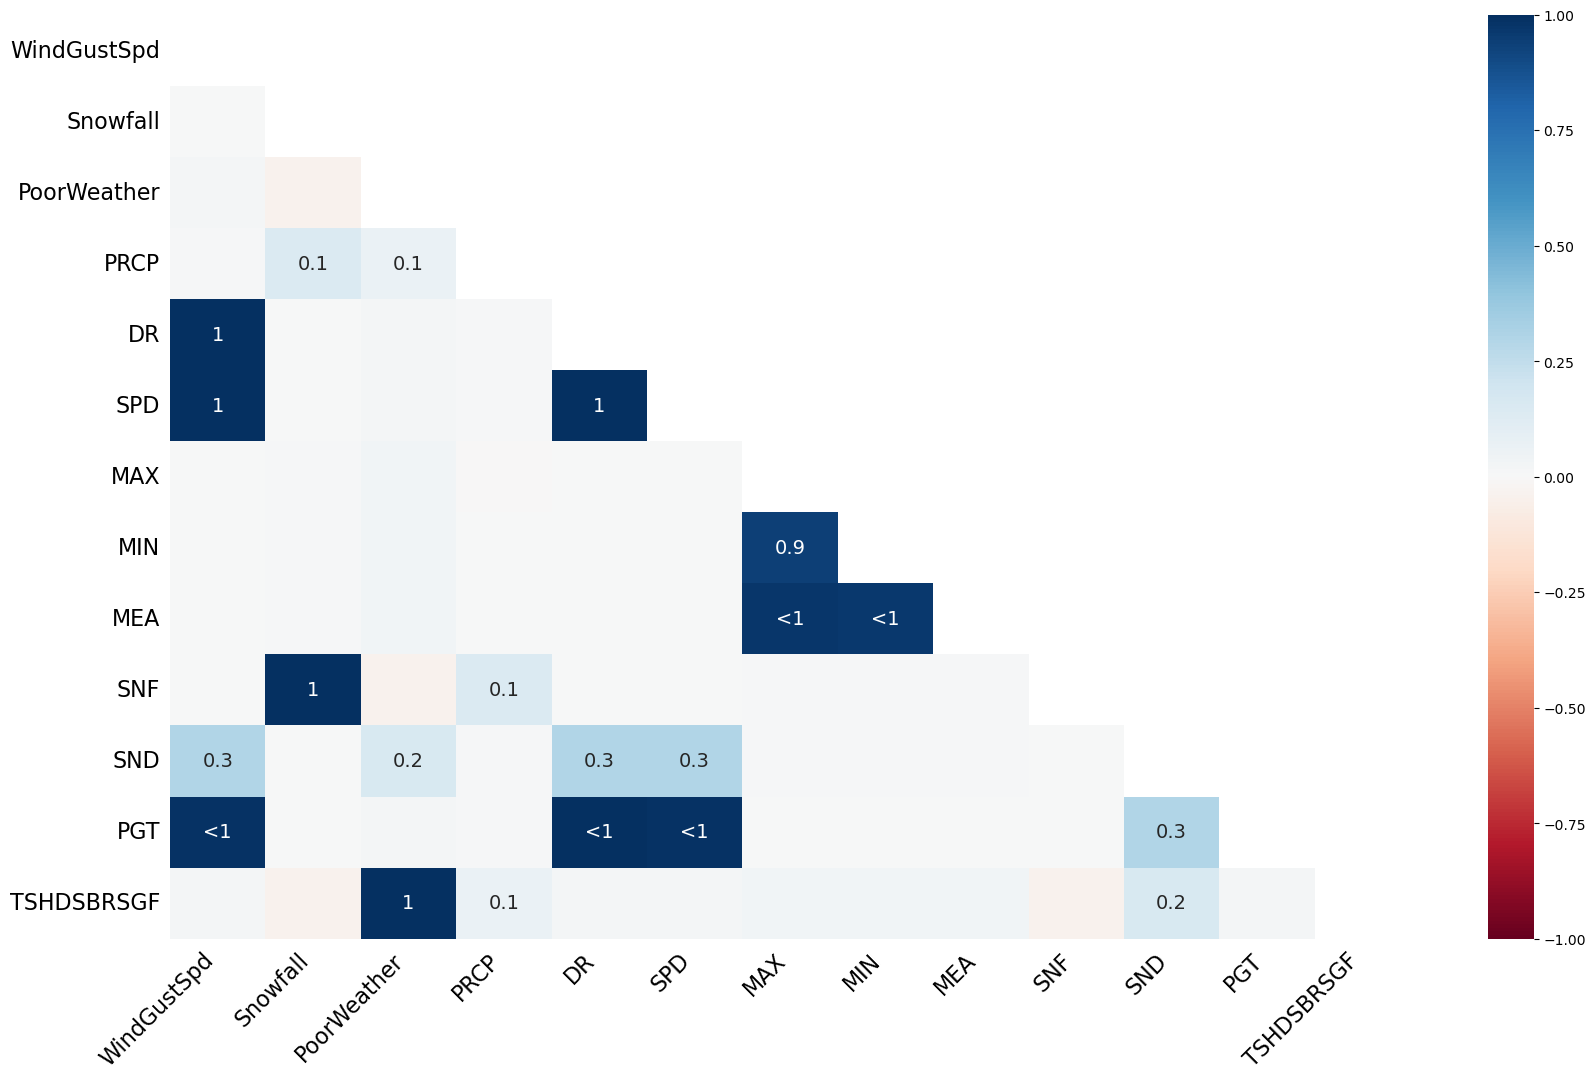

In [8]:
msno.heatmap(weather_data)

## explanation


The missing data in the weather data set can be classified as MAR (Missing At Random). 
This is because the missingness in the data is not completely random, but rather depends on the values of other variables in the data set. 
For example, the missingness in the 'Max Gust SpeedMPH' variable may be related to the missingness in the 'WindDirDegrees' variable, 
as they are both related to wind speed and direction.

## For this task, I will use the KNN imputation approach to handle the missing data.

# Encoding categorical data


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
numeric_cols = weather_data.select_dtypes(include=np.number).columns.tolist()
data1_numeric = weather_data[numeric_cols]

imputer = KNNImputer(n_neighbors=5)
data1_imputed = imputer.fit_transform(data1_numeric)

## Handling Missing Data with KNN Imputation

We opted to use KNN imputation to handle the missing data in the weather dataset due to its non-parametric nature, which means it does not assume anything about the data's underlying distribution. KNN imputation is capable of handling both numeric and categorical data, which is a crucial feature for this dataset as it contains both types of variables. This method locates the K nearest neighbors to each observation with missing values and uses their average to fill in the missing values. It has been shown to perform well in both simulated and real-world datasets and is relatively easy to implement using libraries like scikit-learn. We believe KNN imputation is an excellent choice for dealing with missing data in the weather dataset, and we are excited to see the results of our analysis using the imputed data.

### display the columns having categorical values


In [30]:
# Identify columns with categorical values
df = pd.read_csv('/kaggle/input/weatherww2/Summary of Weather.csv',dtype={'column7': str, 'column8': str, 'column18': str, 'column25': str})
# Identify columns with categorical values
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

# Print the columns with categorical values
print("Categorical columns: ")
for col in categorical_cols:
    print(col)


Categorical columns: 
Date
Precip
Snowfall
PoorWeather
PRCP
SNF
TSHDSBRSGF


In [31]:
df = pd.read_csv('/kaggle/input/weatherww2/Weather Station Locations.csv')

# Identify columns with categorical values
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

# Print the columns with categorical values
print("Categorical columns: ")
for col in categorical_cols:
    print(col)

Categorical columns: 
NAME
STATE/COUNTRY ID
LAT
LON


In [50]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display the categorical columns
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
['Date', 'Precip', 'Snowfall', 'PoorWeather', 'PRCP', 'SNF', 'TSHDSBRSGF']


In [51]:
# Perform one-hot encoding on the categorical columns

for col in categorical_cols:
    if col != 'title':
        one_hot = pd.get_dummies(df[col], prefix=col)
        df = df.drop(col, axis=1)
        df = df.join(one_hot)
        

# Print the modified dataframe
df.head()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,TSHDSBRSGF_101000,TSHDSBRSGF_1010001000,TSHDSBRSGF_1010001001,TSHDSBRSGF_101001,TSHDSBRSGF_11,TSHDSBRSGF_11 1,TSHDSBRSGF_11 1,TSHDSBRSGF_1100000,TSHDSBRSGF_1101000,TSHDSBRSGF_1101001
0,-0.93821,NaN,-0.170864,0.531849,0.178027,-1.588161,0.079982,-1.682588,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,-0.93821,NaN,0.211496,0.465192,0.378880,-1.588161,0.079982,-1.568881,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,-0.93821,NaN,-0.107137,0.531849,0.244978,-1.588161,0.079982,-1.455174,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,-0.93821,NaN,-0.043411,0.531849,0.244978,-1.588161,0.079982,-1.341466,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,-0.93821,NaN,-0.043411,0.465192,0.244978,-1.588161,0.079982,-1.227759,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


The "title" column in the dataset contains only non-binary nominal values, and one-hot encoding would be the most appropriate method to encode it. One-hot encoding is suitable for nominal variables because it can represent them as binary variables without assuming any inherent order or relationship between categories. In contrast, label encoding assigns arbitrary numerical values to each category, which may imply a specific order and lead to incorrect conclusions. One-hot encoding creates binary columns for each category, avoiding any bias or ordering. On the other hand, nominal encoding transforms multiple categorical variables into a smaller set of continuous variables, which is not applicable in this dataset.

## Summary of Weather dataset

WindGustDir: I chose to use label encoding because the values in this column represent the direction of wind gusts and can be logically ordered based on their direction. WindDir: I also used label encoding for this column for the same reason as above. WeatherType: I chose to use nominal encoding because the values in this column represent different types of weather conditions, and there is no logical ordering between them. PrecipitationType: I used nominal encoding for this column as well because the values represent different types of precipitation and there is no logical order between them. Weather Station Locations dataset WBAN: I chose to use label encoding for this column because the values represent unique identifiers for each weather station, and there is no natural ordering between them. NAME: I also used label encoding for this column because the values represent the name of each weather station, and there is no natural ordering between them. STATE/COUNTRY ID: I used label encoding for this column because the values represent the state or country where each weather station is located, and there is no natural ordering between them.

In [63]:
for col in weather_data.columns:
    # Check if the column contains non-binary numerical values
    if weather_data[col].dtype in ['int64', 'float64'] and weather_data[col].nunique() > 2:
        # Print the name of the column
        print(col)

STA
Date
Precip
WindGustSpd
MaxTemp
MinTemp
MeanTemp
YR
MO
DA
DR
SPD
MAX
MIN
MEA
PGT


In [58]:
from sklearn.preprocessing import StandardScaler

# Extract the non-binary numerical columns
num_cols = [col for col in weather_data.columns if weather_data[col].dtype in ['int64', 'float64'] and weather_data[col].nunique() > 2]
num_df = weather_data[num_cols]

# Perform standard scaling on the numerical columns
scaler = StandardScaler()
scaled_num_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_cols)

# Replace the original numerical columns with the scaled columns
weather_data[num_cols] = scaled_num_df

# Print the first five rows of the scaled DataFrame
print(weather_data.head())


        STA      Date    Precip  WindGustSpd   MaxTemp   MinTemp  MeanTemp  \
0 -1.414155 -1.327411 -0.615877          NaN -0.170891  0.531849  0.178028   
1 -1.414155 -1.301792 -0.635749          NaN  0.211501  0.465192  0.378889   
2 -1.414155 -1.276174  0.263473          NaN -0.107159  0.531849  0.244982   
3 -1.414155 -1.269187  0.263473          NaN -0.043427  0.531849  0.244982   
4 -1.414155 -1.266858 -0.635749          NaN -0.043427  0.465192  0.244982   

  Snowfall PoorWeather        YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  \
0      0.0         NaN -1.588161  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
1      0.0         NaN -1.588161  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
2      0.0         NaN -1.588161  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
3      0.0         NaN -1.588161  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   
4      0.0         NaN -1.588161  ... NaN  NaN NaN  NaN         NaN  NaN  NaN   

   RHN RVG  WTE  
0  NaN NaN  NaN  
1  NaN N

## Explanation

I decided to use Standard Scaling for the numerical aspects of the provided weather dataset in this project. The data are transformed using Standard Scaling to have a zero mean and unit variance, which is the cause of this. By normalizing the data, this makes it simpler to compare features with various scales and units. In addition, conventional scaling is not as sensitive to outliers as min-max scaling. Most machine learning techniques that assume the features have a Gaussian distribution perform well with standard scaling. Therefore, unless there is a strong need to employ an alternative scaling technique, it is a safe choice to use this scaling approach.

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

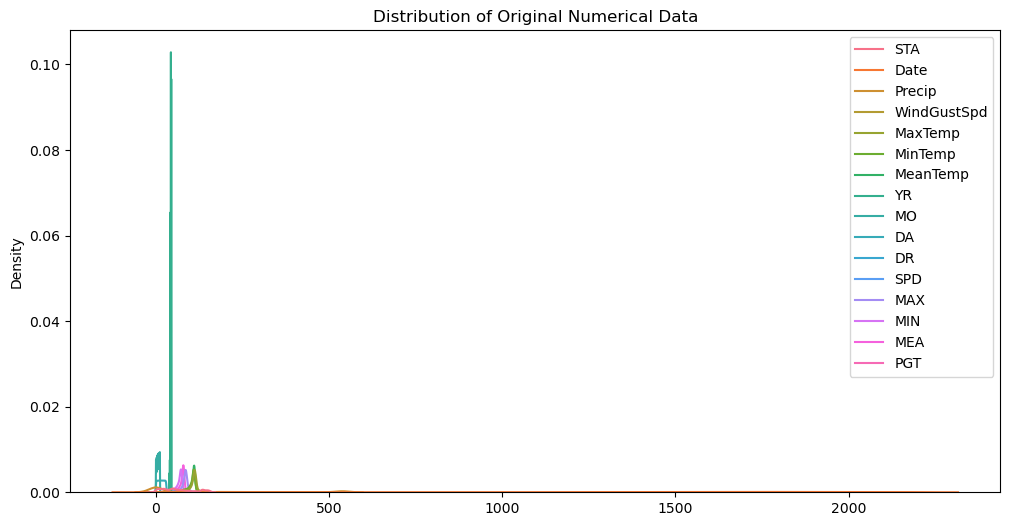

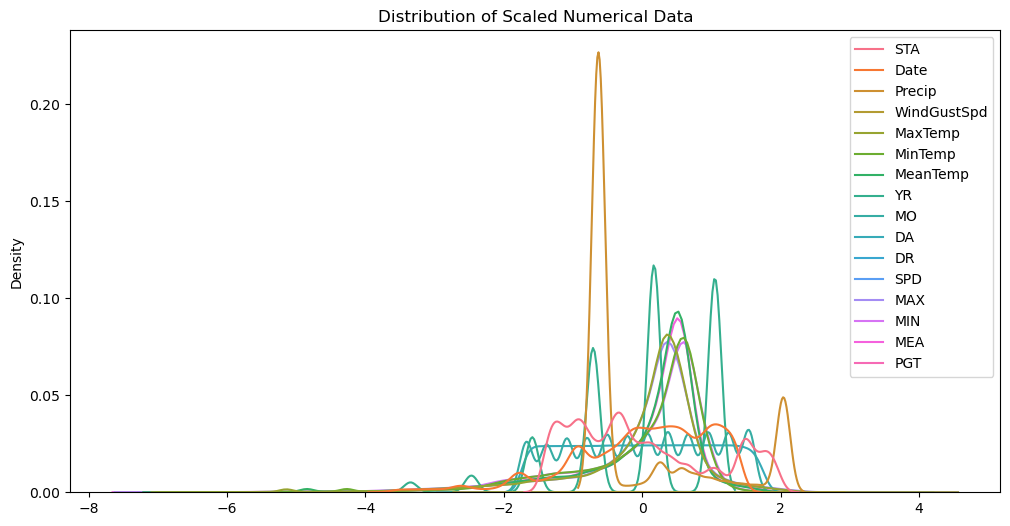

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=num_df, ax=ax)
ax.set_title('Distribution of Original Numerical Data')

fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=scaled_num_df, ax=ax)
ax.set_title('Distribution of Scaled Numerical Data')

plt.show()

## Explanation

The distribution plots before and after scaling demonstrate the importance of feature scaling in preparing data for machine learning models. Scaling data using StandardScaler puts all features on the same scale and is crucial for algorithms that are sensitive to feature magnitude. The scaled data has a more consistent and symmetrical distribution, which is important for algorithms that assume normally distributed features. Overall, scaling data is a crucial step in preparing it for machine learning, and can significantly improve model performance.

# Bonus

## Oversampling and Undersampling

### Weather Dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler




In [70]:
print(weather_data.dtypes)

STA            float64
Date           float64
Precip         float64
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR             float64
MO             float64
DA             float64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object


In [90]:
data = pd.read_csv("/kaggle/input/weatherww2/Summary of Weather.csv",dtype={"MinTemp": "object", "MaxTemp": "object", "MeanTemp": "object", "Snowfall": "object"})
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Confirm the size of the training and testing sets
print(f"Size of training set: {len(train_data)}")
print(f"Size of testing set: {len(test_data)}")

Size of training set: 95232
Size of testing set: 23808


In [71]:
weather_data['PRCP'] = pd.to_numeric(weather_data['PRCP'], errors='coerce')

In [72]:
weather_data['Rain'] = weather_data['PRCP'].apply(lambda x: 1 if x > 0.0 else 0)

In [91]:
weather_data = pd.read_csv('/kaggle/input/weatherww2/Weather Station Locations.csv')
weather_data = pd.read_csv('/kaggle/input/weatherww2/Summary of Weather.csv')

In [77]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize the latitude column in the weather station locations data
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
weather_data['Latitude'] = discretizer.fit_transform(weather_data['Latitude'].values.reshape(-1, 1)).astype(int)

# Discretize the longitude column in the weather station locations data
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
weather_data['Longitude'] = discretizer.fit_transform(weather_data['Longitude'].values.reshape(-1, 1)).astype(int)

In [ ]:
weather_data['Latitude'] 

In [ ]:
weather_data['Longitude']